In [1]:
# Importing the neccessary libraries 
import pandas as pd
import numpy as np

# Warning Suppression 
import warnings
warnings.filterwarnings('ignore')

### Setting Display options to ensure feature name visibility
pd.set_option('display.max_columns', None)

## Load the Data

In [2]:
X = pd.read_csv(r'C:\Users\priya\PycharmProjects\Employee_attrition_project\Data\independent_features')

In [3]:
Y = pd.read_csv(r'C:\Users\priya\PycharmProjects\Employee_attrition_project\Data\target_feature')

# Split the data into test and train sets

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=18, stratify=Y)

In [6]:
# To check if the testing data is a representator of the population

print("Shape of Training Data", x_train.shape)
print("Shape of Testing Data", x_test.shape)
print()
print("Attrition Rate in Training Data", y_train.mean())
print("Attrition Rate in Testing Data", y_test.mean())

Shape of Training Data (1176, 37)
Shape of Testing Data (294, 37)

Attrition Rate in Training Data Attrition    0.161565
dtype: float64
Attrition Rate in Testing Data Attrition    0.159864
dtype: float64


# Importing necessary libraries for Model Building

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 



# Building Model
# 1. Decision Tree Model

In [8]:
# Building a Decision Tree Model
model_dt=DecisionTreeClassifier(criterion='gini',random_state=18)

In [9]:
# Find best parameters
from func_for_model import gridsearch
gridsearch(x_train, y_train, model=model_dt)

The time taken in grid search:  7.00


('Best Parameters using grid search:',
 {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 55})

In [10]:
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=18, criterion = "gini", max_depth= 5, min_samples_split= 55, max_features="log2")
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ", model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ", model_dt_score_test)

Training score:  0.8469387755102041
Testing score:  0.8435374149659864


In [11]:
# Predictions
y_pred_dt = model_dt.predict(x_test)

## 1.1 Performance Metrics
### AUC

In [12]:
#Area Under the Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt ## Area Under the Curve

0.5623223361185288

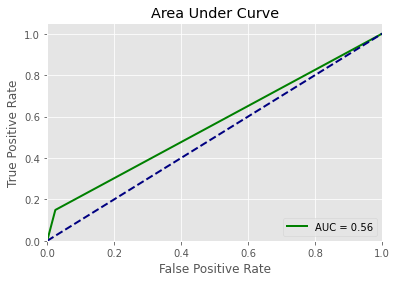

In [13]:
from func_for_model import auc_chart
auc_chart(fpr_dt, tpr_dt, roc_auc_dt)

### Confusion Matrix

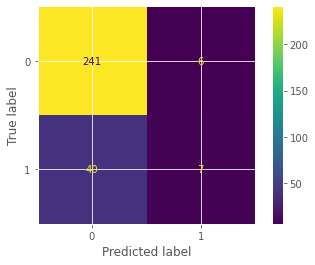

In [14]:
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision, recall,  f1-score 

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision",metrics.precision_score(y_test, y_pred_dt))
print("Recall",metrics.recall_score(y_test, y_pred_dt))
print("f1_score",metrics.f1_score(y_test, y_pred_dt))

Accuracy: 0.8435374149659864
Precision 0.5384615384615384
Recall 0.14893617021276595
f1_score 0.23333333333333334


In [16]:

print("Classification Report\n", classification_report(y_test, y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.54      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.70      0.56      0.57       294
weighted avg       0.81      0.84      0.80       294



                                        ----------------------------------------

# 2. Random Forest

In [17]:
# Buidling Random Forest
model_rf=RandomForestClassifier(criterion='gini',random_state=18)

In [18]:
# Find best parameters
gridsearch(x_train, y_train, model=model_rf)

The time taken in grid search:  125.28


('Best Parameters using grid search:',
 {'max_depth': 5, 'max_features': None, 'min_samples_split': 25})

In [19]:
rf=RandomForestClassifier(criterion='gini', random_state=18, max_depth=5, min_samples_split=25, max_features=None)
rf.fit(x_train,y_train)
model_rf_score_train = rf.score(x_train, y_train)
print("Training score: ", model_rf_score_train)
model_rf_score_test = rf.score(x_test, y_test)
print("Testing score: ", model_rf_score_test)

Training score:  0.8801020408163265
Testing score:  0.8605442176870748


In [20]:
# predictions
y_pred_rf=rf.predict(x_test)

## 2.1 Performance Metrics
### AUC

In [21]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.5896718063571367

### Confusion Matrix

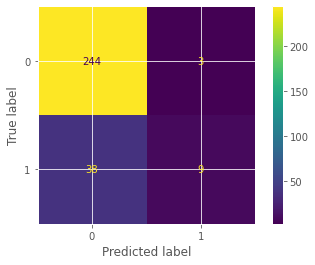

In [22]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision, recall,  f1-score 

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test, y_pred_rf))
print("Recall",metrics.recall_score(y_test, y_pred_rf))
print("f1_score",metrics.f1_score(y_test, y_pred_rf))

Accuracy: 0.8605442176870748
Precision 0.75
Recall 0.19148936170212766
f1_score 0.3050847457627119


In [24]:
print("Classification Report\n", classification_report(y_test, y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.75      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.81      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



                                        -------------------------------------

# 3. Gradient Boosting Model (GBM)

In [27]:
gbm=GradientBoostingClassifier(criterion='friedman_mse', random_state=18, max_depth=4, min_samples_split=35, max_features="log2")
gbm.fit(x_train,y_train)
model_gbm_score_train = gbm.score(x_train, y_train)
print("Training score: ", model_gbm_score_train)
model_gbm_score_test = gbm.score(x_test, y_test)
print("Testing score: ", model_gbm_score_test)

Training score:  0.9625850340136054
Testing score:  0.8741496598639455


In [28]:
# predicitons
y_pred_gbm=gbm.predict(x_test)

## 3.1 Performance Metrics
### AUC

In [29]:
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
roc_auc_gbm

0.6494530105952279

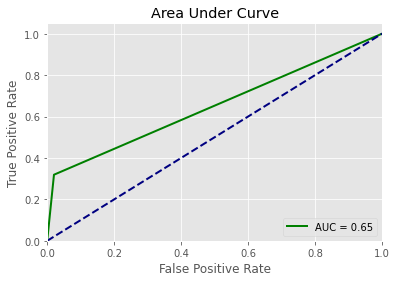

In [30]:
auc_chart(fpr_gbm, tpr_gbm, roc_auc_gbm)

### Confusion Matrix

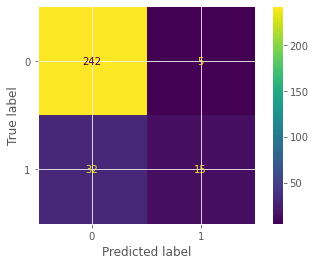

In [31]:
cm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Precision, Recall, f1-Score

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8741496598639455
Precision 0.75
Recall 0.3191489361702128
f1_score 0.4477611940298508


In [33]:
print("Classification Report\n", classification_report(y_test, y_pred_gbm))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.75      0.32      0.45        47

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



                                            **************************************